# 1- Known deep learning architectures

    1. AlexNet

AlexNet is the first deep architecture which was introduced by one of the pioneers in deep learning – Geoffrey Hinton and his colleagues. It is a simple yet powerful network architecture, which helped pave the way for groundbreaking research in Deep Learning as it is now. Here is a representation of the architecture as proposed by the authors.


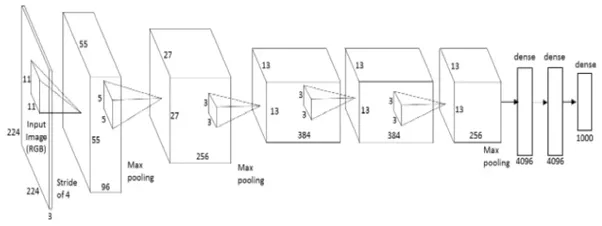


When broken down, AlexNet seems like a simple architecture with convolutional and pooling layers one on top of the other, followed by fully connected layers at the top. This is a very simple architecture, which was conceptualised way back in 1980s. The things which set apart this model is the scale at which it performs the task and the use of GPU for training. In 1980s, CPU was used for training a neural network. Whereas AlexNet speeds up the training by 10 times just by the use of GPU.

Although a bit outdated at the moment, AlexNet is still used as a starting point for applying deep neural networks for all the tasks, whether it be computer vision or speech recognition.

    2. ResNet

ResNet is one of the monster architectures which truly define how deep a deep learning architecture can be. Residual Networks (ResNet in short) consists of multiple subsequent residual modules, which are the basic building block of ResNet architecture. A representation of residual module is as follows


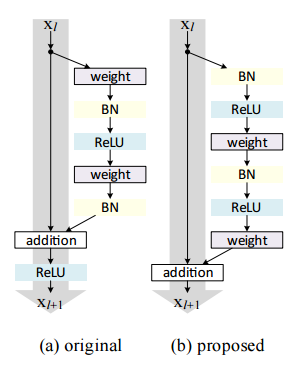


In simple words, a residual module has two options, either it can perform a set of functions on the input, or it can skip this step altogether.

Now similar to GoogleNet, these residual modules are stacked one over the other to form a complete end-to-end network.


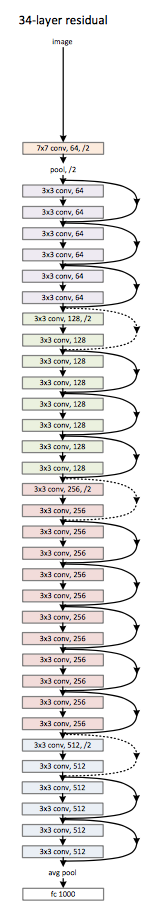


A few more novel techniques which ResNet introduced are:

    Use of standard SGD instead of a fancy adaptive learning technique. This is done along with a reasonable initialization function which keeps the training intact
    Changes in preprocessing the input, where the input is first divided into patches and then feeded into the network

The main advantage of ResNet is that hundreds, even thousands of these residual layers can be used to create a network and then trained. This is a bit different from usual sequential networks, where you see that there is reduced performance upgrades as you increase the number of layers.

    3.Transformers Models

Unlike other deep learning mechanisms, the Transformers model uses attention mechanisms. The encoder-decoder layers included in the Transformers model use a method called the attention mechanism. This mechanism focuses on the information that seems necessary for future predictions giving more weight and rendering the others trivial. Its difference from other deep learning algorithms such as LSTM is that it provides faster model training with multiple encoder-decoder architectures working in parallel. This is a technology used especially in chatbots. 

    4.MQRNN

Multi-horizon Quantile Recurrent Neural Network (MQRNN) is an RNN-based non-parametric probabilistic forecasting model proposed by Amazon 6. It uses quantile loss to predict values for each desired quantile for every time step in the forecast horizon. One problem with recursive forecast generators like DeepAR, is that they tend to accumulate errors from previous steps during recursive forecast generation. Some empirical search also suggests that directly forecasting values for the full forecast horizon are less biased, more stable, and retrains the efficiency of the parameter sharing 7. MQRNN builds on this idea and uses direct multi-horizon forecasting instead of a one-step-ahead recursive forecasting approach. It also incorporates both static and temporal covariates and solves the following large-scale time series regression problem:


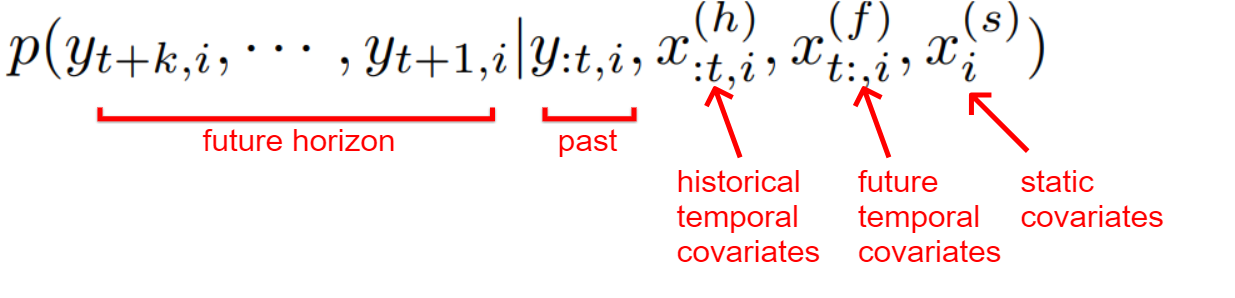


Incorporating Future Covariate Values

This paper suggests that distant future information can have a retrospective impact on near-future horizons. For example, if a festival or black-Friday sales event is coming up in the future, the anticipation of it can affect a customer’s buying decisions. As explained later, this future information is supplied to the two decoder MLP components.
Decoder Design

The model adopts the encoder-decoder framework. The encoder is a vanilla LSTM network that takes historical time series and covariates values. For the decoder structure, the model uses two MLP branches instead of a recursive decoder. As stated earlier, the model focuses on directly producing output for the full horizon at once. The MLP branches are used to achieve this goal. The design philosophy for the two decoders is as follows:

Global Decoder: The global MLP takes encoder output and future covariates as input, and generates two context vectors as output: horizon-specific context, and horizon-agnostic context. mqrnn-global decoder


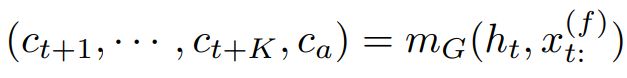


The idea here behind horizon-specific context is that it carries the structural awareness of the temporal distance between a forecast creation time point and a specific horizon. This is essential to aspects like seasonality mapping. Whereas the horizon-agnostic context is based on the idea that not all relevant information is time-sensitive. Note that in the standard encoder-decoder architecture, only horizon-agnostic context exists, and horizon awareness is indirectly enforced by recursively feeding predictions not the RNN cell for the next time step.

Local Decoder: The local MLP takes the global decoder’s outputs and also future covariates as input, and generates all required quantiles for each specific horizon. mqrnn-local decoder


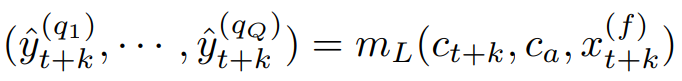


The local MLP is key to aligning future seasonality and event, and the capability to generate sharp, spiky forecasts. In cases where there is no meaningful future information, or sharp, spiky forecasts are not desired, the local MLP can be removed.

Model Architecture


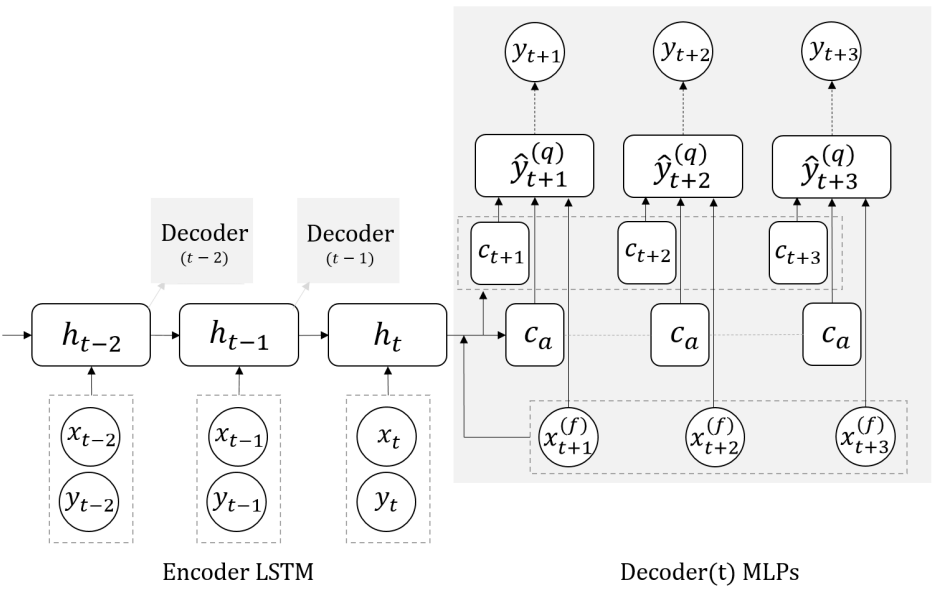


The loss function for MQRNN is the sum of individual quantile loss, and the output is all the quantile forecasts. At 0.5 quantile, the quantile loss is simply the Mean Absolute Error and its minimizer is the median of the predictive distribution. MQRNN generates multi-horizon forecasts by placing a series of decoders, with shared parameters, at each recurrent layer (time point) in the encoder, and computes the loss against the corresponding targets. Each time series of arbitrary lengths can serve as a single sample in the model training, hence allowing cold content with limited history to also be used in the model. It also uses static information by replicating it across time. The authors also recommend trying different encoder structures for processing sequential input, like dilated 1D causal convolution layers (MQCNN), NARX-like LSTM, or WaveNet.

# 5-Time series data augmentation 


# 1. Jittering / Gaussian noise

Jittering is a technique for improving time series data by adding random noise to the original signals. This technique improves the robustness and generalizability of machine learning models by simulating small changes in real-world conditions. 

In [ ]:
def add_gaussian_noise(time_series, mean=0.0, stddev=1.0):
    """
    Adds Gaussian noise to a time series.

    Options:
    time_series (array-like): A time series to which noise is added.
    mean (float): The average value of the noise. Default is 0.0.
    stddev (float): Standard deviation of noise. Default is 1.0.

    Returns:
    noisy_series (np.array): Time series with added noise.
    """
    # Gaussian noise generation
    noise = np.random.normal(mean, stddev, len(time_series))

    # Adding noise to the original time series
    noisy_series = time_series + noise

    return noisy_series

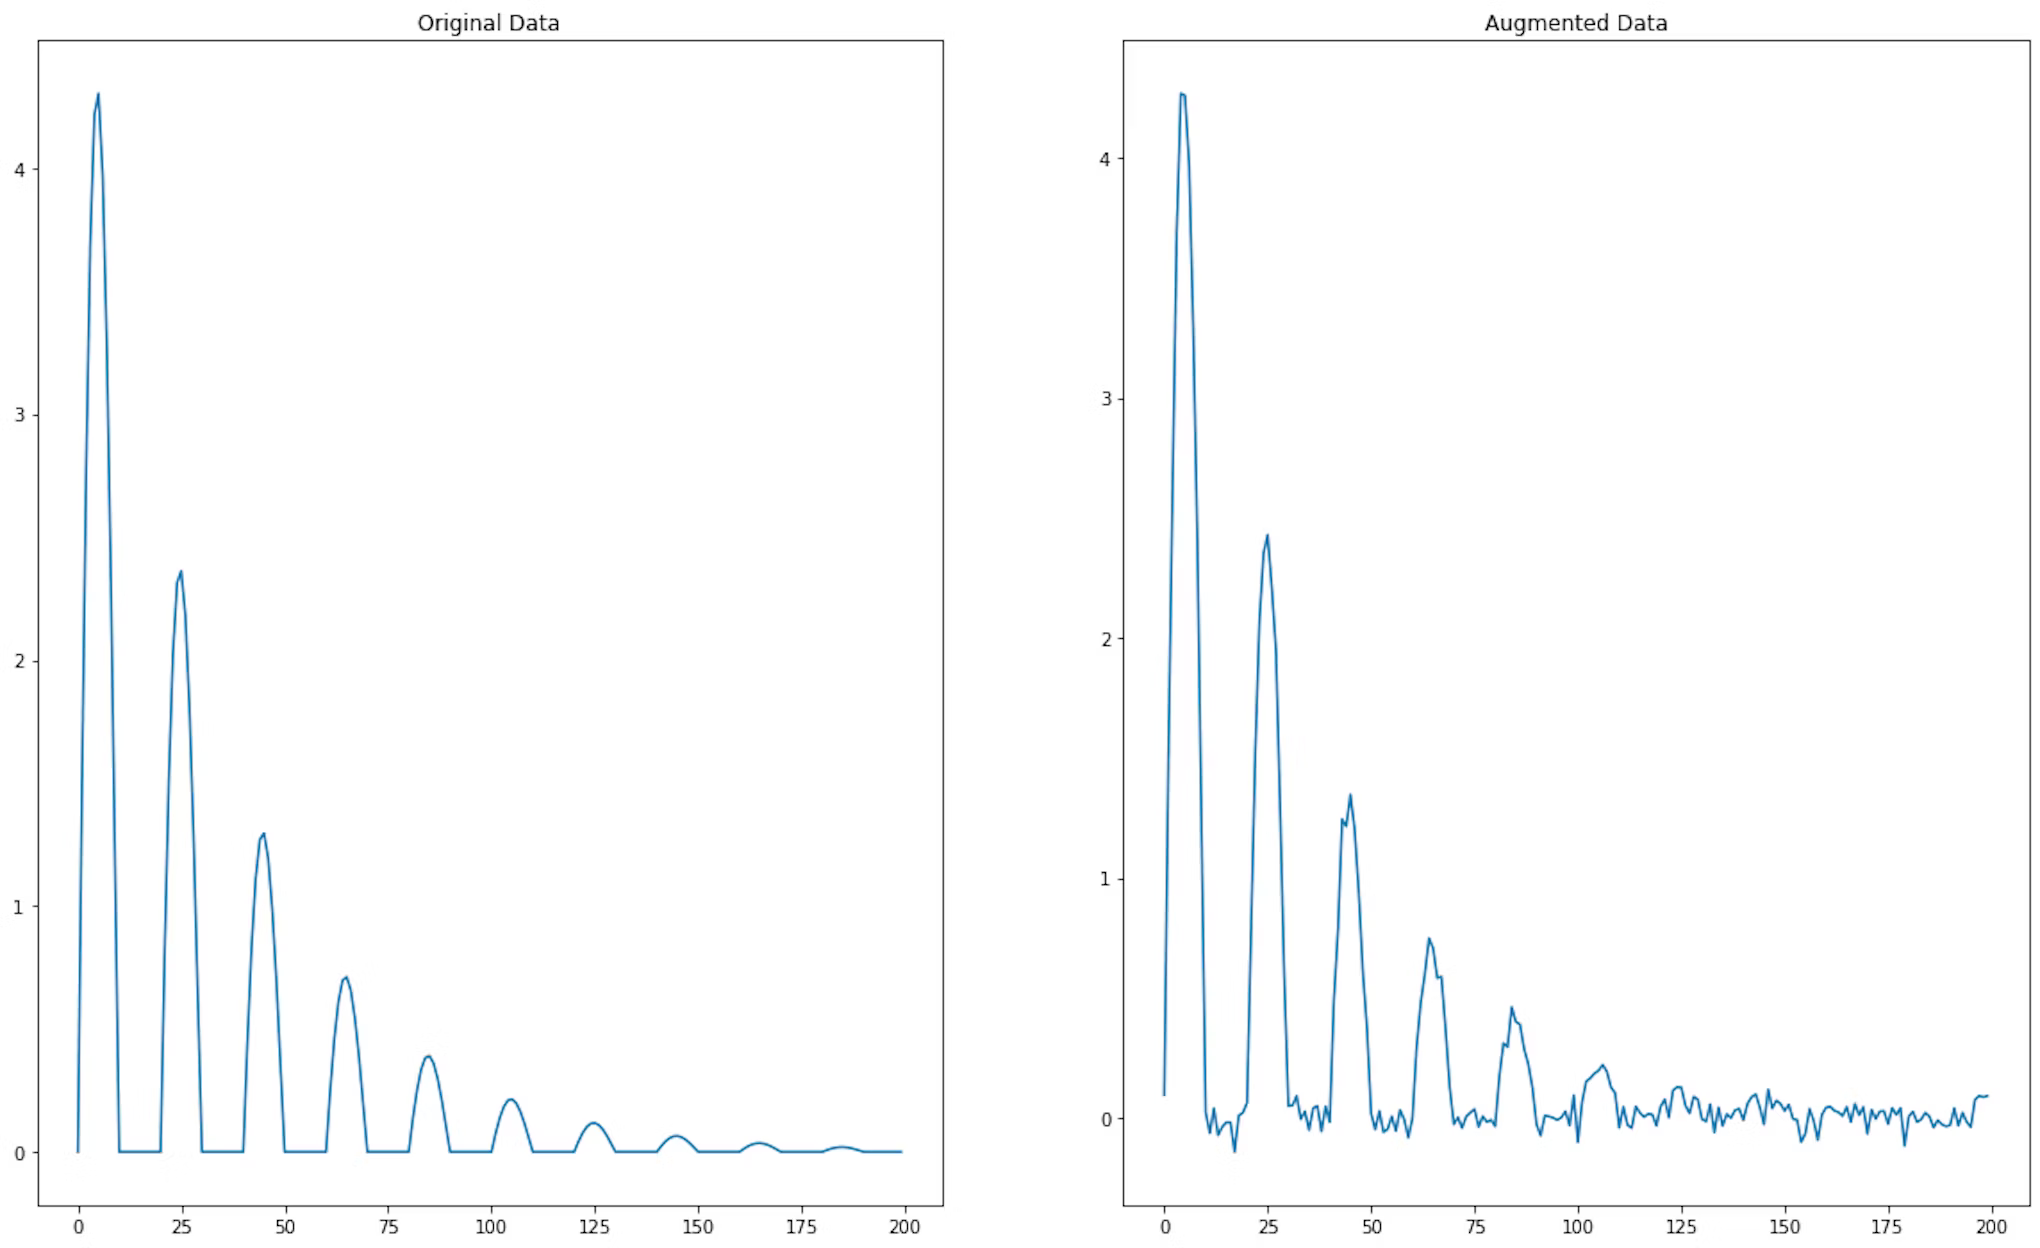


# 2. Scaling

A scaling procedure is a change in the amplitude of the value of a certain dimension of a time series. The basic idea of this approach is the transformation of the range of values, but while preserving the shape of the time series. Mathematical formulation of scaling is the following:



In [ ]:
def add_scaling(time_series, scale_factor):
    """
    Scales a time series by multiplying each element by scale_factor.

    :param time_series: numpy array, time series to be scaled
    :param scale_factor: the number by which all elements of the series will be multiplied
    :return: numpy array, scaled time series
    """
    scaled_time_series = time_series * scale_factor
    return scaled_time_series

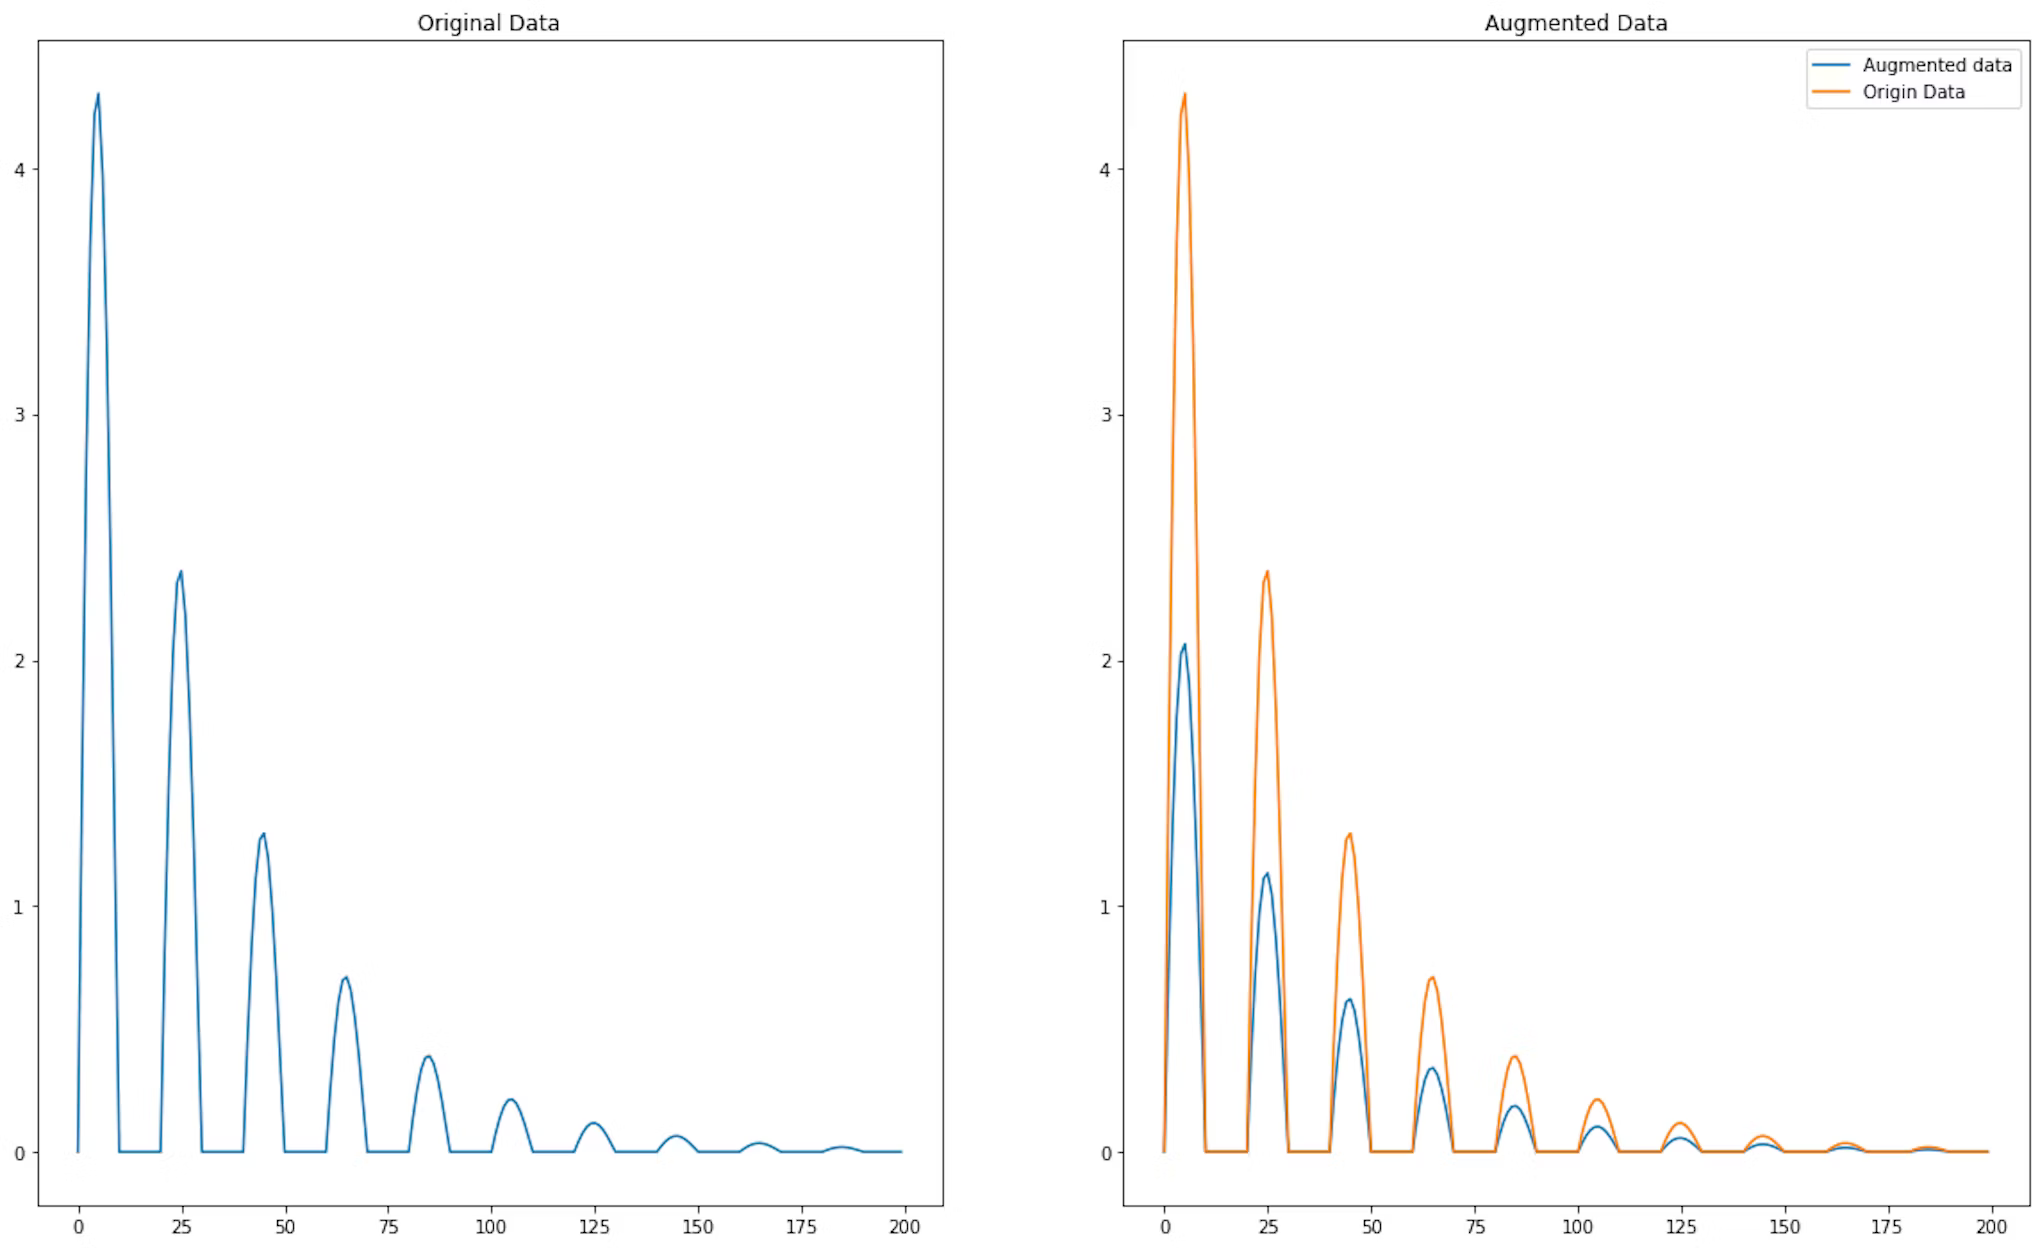

# 3. Magnitude Warping

Magnitude warping for time series data is like turning the volume knob up and down on a song, but at different points in time. Here's the breakdown:

    Imagine a heartbeat recording:

The ups and downs represent the strength of your heartbeat.
The order of the ups and downs shows the timing of your heartbeats.

    What magnitude warping does:

It doesn't change the order of the ups and downs (heartbeat timing).
It adjusts the height of the ups and downs (heartbeat strength). It might make some heartbeats seem stronger or weaker without changing when they happen.


In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline


def magnitude_warp(data, sigma=0.1, num_knots=10):
    """
    This function performs magnitude warping on a time series data.

    Args:
        data (np.ndarray): The original time series data (1D array).
        sigma (float, optional): Standard deviation for the random knot heights.
            Defaults to 0.1. Higher sigma creates more significant warping.
        num_knots (int, optional): The number of knots used to define the warping curve.
            Defaults to 10. More knots allow for more complex warping patterns.

    Returns:
        np.ndarray: The warped time series data (1D array).
    """

    # Get the number of data points
    n_data = len(data)

    # Define knot positions (evenly spaced across the time series)
    knot_positions = np.linspace(0, 1, num_knots)

    # Generate random knot heights with a normal distribution (mean=0, std=sigma)
    knot_heights = np.random.normal(scale=sigma, size=num_knots)

    # Create a cubic spline interpolation object
    spline = CubicSpline(knot_positions, knot_heights)

    # Generate warping factors for each data point based on the spline curve
    warping_factors = spline(np.linspace(0, 1, n_data))

    # Apply warping to the original data (element-wise multiplication)
    warped_data = data * warping_factors

    return warped_data

# Ideas to improve the project
    1.training the model with both time series AND  FFT
for example : for each datasample we would put the time series then its FFT with it 

imagine it like this :
X_train[0][:2084] would be the first time series itself and X_train[0][2084:] would be its FFT 

    2.Regularization Techniques: 
Use methods like L1/L2 regularization or dropout layers to prevent overfitting.


    3.Transfer Learning:
Leverage a pre-trained model on a larger vibration analysis dataset and fine-tune it on your smaller dataset. This can help the model learn general features applicable to your specific task.

